## 평수별 등록 차량 대수

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [32]:
pre_train = pd.read_csv("parking_data/pre_train.csv", index_col=[0])
pre_train.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


In [118]:
code_area = pre_train[["단지코드","전용면적"]]
mean_code_area = code_area.groupby("단지코드").mean()
mean_code_area.columns=["면적평균"]
max_code_area = code_area.groupby("단지코드").max()
max_code_area.columns=["면적최대"]
min_code_area = code_area.groupby("단지코드").min()
min_code_area.columns=["면적최소"]

area_check = pd.concat([mean_code_area,max_code_area, min_code_area], axis=1)

In [120]:
area_check["면적차이"]=area_check["면적최대"]-area_check["면적최소"]
area_check.head()

,면적평균,면적최대,면적최소,면적차이
단지코드,,,,
C1000,45.218571,51.93,39.57,12.36
C1004,39.136842,240.22,14.10,226.12
C1005,54.360000,59.64,51.49,8.15
C1013,46.142000,51.86,39.65,12.21
C1014,49.232857,59.73,33.35,26.38


In [128]:
area_check.sort_values(by="면적차이", ascending=False).head(50)

,면적평균,면적최대,면적최소,면적차이
단지코드,,,,
C2132,53.462766,583.40,15.00,568.40
C1616,69.338182,583.40,26.37,557.03
C1859,54.065250,583.40,26.37,557.03
C2310,65.699565,583.40,26.37,557.03
C2289,64.267083,583.40,26.37,557.03
C1439,42.334375,404.65,15.00,389.65
C1109,45.409545,401.50,21.85,379.65
C2416,63.779000,317.17,19.69,297.48
C2597,36.812188,248.56,15.00,233.56


In [38]:
area_train = pre_train.groupby(["단지코드","등록차량수","전용면적","총세대수","주차면수","노선수","버스"]).sum()
print(len(area_train))
area_train.head()

1835


전용면적별세대수    빈집
단지코드  등록차량수 전용면적  총세대수 주차면수  노선수 버스                 
C1000 481.0 39.57 566  438.0 0.0 1.0       344  20.0
            39.93 566  438.0 0.0 1.0        75  10.0
            46.70 566  438.0 0.0 1.0        36  10.0
            46.90 566  438.0 0.0 1.0        36  10.0
            51.93 566  438.0 0.0 1.0        75  20.0

In [41]:
area_train = area_train.reset_index(level=[1,2,3,4,5,6])
print(len(area_train))
area_train.head()

1835


,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집
단지코드,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0


In [42]:
area_train.to_csv("parking_data/area_train.csv")

In [43]:
area_train.head(10)

,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집
단지코드,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0
C1004,93.0,14.10,521,153.0,0.0,2.0,1,3.0
C1004,93.0,19.00,521,153.0,0.0,2.0,1,3.0
C1004,93.0,19.31,521,153.0,0.0,2.0,1,3.0
C1004,93.0,21.19,521,153.0,0.0,2.0,2,6.0


In [ ]:
# 등록차량수/총세대수 단지별 전용면적

- 단지별로 등록차량 수가 같아서 단지별 전용면적 평균을 구한 후 그 면적의 등록차량 수를 구했다.

In [24]:
pre_train[pre_train["단지코드"]=="C2515"]

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
13,C2515,545,아파트,경상남도,51.97,106,17.0,190090,0.0,3.0,624.0,205.0
14,C2515,545,아파트,경상남도,51.97,26,17.0,190090,0.0,3.0,624.0,205.0


In [32]:
code_area=pre_train.groupby("단지코드").mean()["전용면적"]
code_area = pd.DataFrame(code_area)
code_area.columns=["단지별_면적평균"]
code_area.sort_values(by="단지별_면적평균")

,단지별_면적평균
단지코드,
C2059,23.156667
C2433,24.616000
C2437,24.830000
C1210,25.608000
C1565,25.625000
...,...
C2496,82.387500
C1636,82.442500
C1804,82.537500


In [44]:
area_parking = pd.merge(area_train, code_area, left_index=True, right_index=True)

In [45]:
area_parking.head()

,등록차량수,전용면적,총세대수,주차면수,노선수,버스,전용면적별세대수,빈집,단지별_면적평균
단지코드,,,,,,,,,
C1000,481.0,39.57,566,438.0,0.0,1.0,344,20.0,45.218571
C1000,481.0,39.93,566,438.0,0.0,1.0,75,10.0,45.218571
C1000,481.0,46.70,566,438.0,0.0,1.0,36,10.0,45.218571
C1000,481.0,46.90,566,438.0,0.0,1.0,36,10.0,45.218571
C1000,481.0,51.93,566,438.0,0.0,1.0,75,20.0,45.218571


In [56]:
target = area_parking[["등록차량수","단지별_면적평균"]]
target = target.reset_index()
target.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1000,481.0,45.218571
2,C1000,481.0,45.218571
3,C1000,481.0,45.218571
4,C1000,481.0,45.218571


In [57]:
target = target.groupby("단지코드").mean()

In [58]:
target_graph = target.reset_index()
target_graph.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1004,93.0,39.136842
2,C1005,376.0,54.360000
3,C1013,1665.0,46.142000
4,C1014,708.0,49.232857


In [62]:
target_graph.to_csv("parking_data/area_parking.csv", index=False)

In [18]:
area_parking = pd.read_csv("parking_data/area_parking.csv")
area_parking.head()

,단지코드,등록차량수,단지별_면적평균
0,C1000,481.0,45.218571
1,C1004,93.0,39.136842
2,C1005,376.0,54.360000
3,C1013,1665.0,46.142000
4,C1014,708.0,49.232857


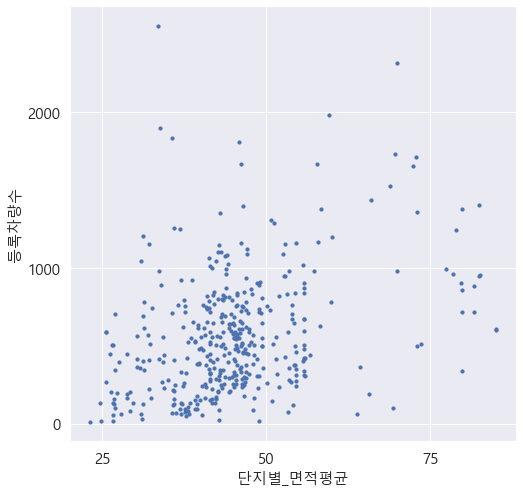

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(area_parking["단지별_면적평균"],area_parking["등록차량수"], s=10)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)

In [93]:
correlation = area_parking.corr()
round(correlation.iloc[0,1],2)

0.35

C:\Users\gyeoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


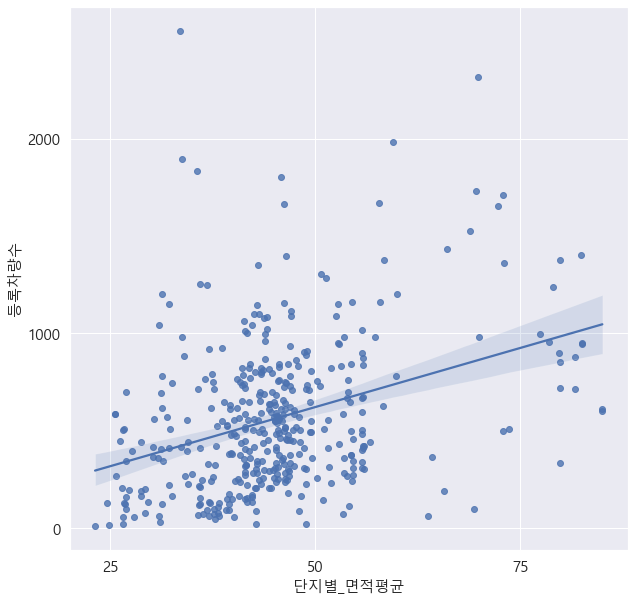

In [44]:
plt.figure(figsize=(10,10))
sns.regplot("단지별_면적평균","등록차량수", data=area_parking)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)

In [47]:
loc = pre_train[["단지코드","지역"]].drop_duplicates().set_index("단지코드")

In [54]:
loc_hue_graph = pd.merge(loc,area_parking, left_index=True, right_on="단지코드").set_index("단지코드")

In [97]:
loc_hue_graph.to_csv("parking_data/loc_area_car.csv")

C:\Users\gyeoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


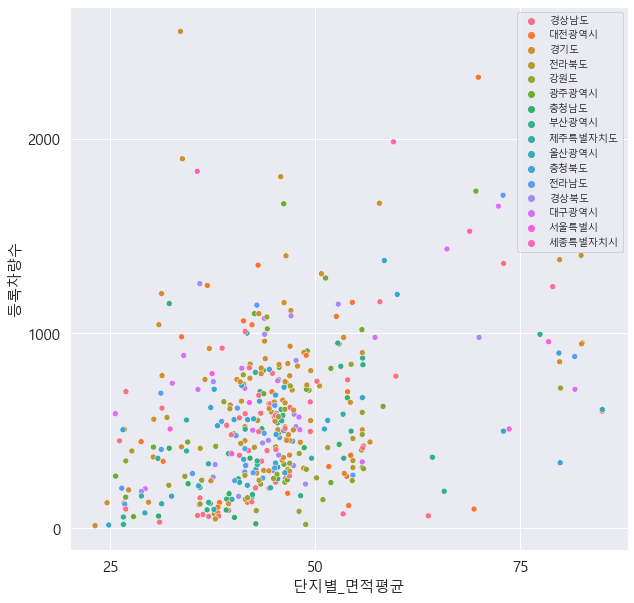

In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot("단지별_면적평균","등록차량수", hue="지역", data=loc_hue_graph)
plt.ylabel("등록차량수", fontsize=15)
plt.xlabel("단지별_면적평균", fontsize=15)
plt.yticks([0,1000,2000],fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=10)

In [77]:
location = list(loc_hue_graph.value_counts("지역").index)
location

['경기도',
 '경상남도',
 '강원도',
 '충청북도',
 '대전광역시',
 '부산광역시',
 '광주광역시',
 '전라남도',
 '경상북도',
 '전라북도',
 '충청남도',
 '대구광역시',
 '제주특별자치도',
 '울산광역시',
 '서울특별시',
 '세종특별자치시']

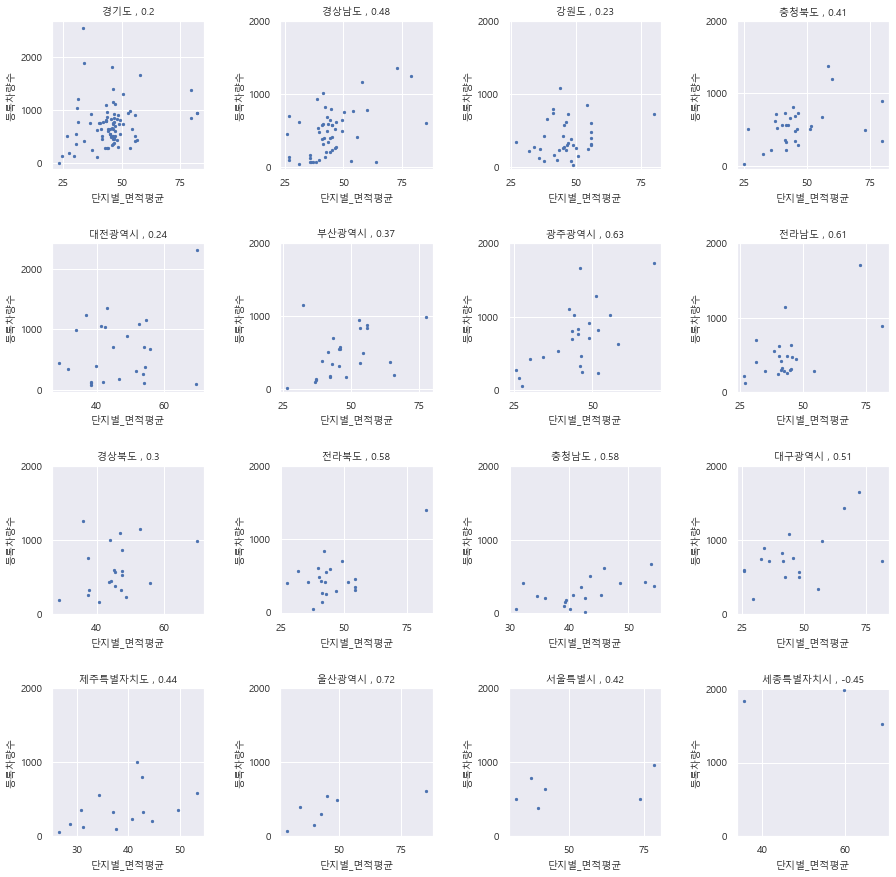

In [95]:
plt.figure(figsize=(15,15))
for loc in location:
        plt.subplot(4,4,location.index(loc)+1)
        target = loc_hue_graph[loc_hue_graph["지역"]==loc]       
        plt.scatter(target["단지별_면적평균"],target["등록차량수"], s=5)
        plt.ylabel("등록차량수", fontsize=10)
        plt.xlabel("단지별_면적평균", fontsize=10)
        plt.yticks([0,1000,2000],fontsize=10)
        plt.xticks(fontsize=10)
        plt.title(loc+" , "+str(round(target.corr().iloc[0,1],2)), fontsize=10)
        
plt.subplots_adjust(wspace=0.5, hspace=0.5)

- 세종특별자치시 : 데이터가 몇 개 없어 경향을 잘 파악할 수 없음
- 평수가 큰 단지가 모여있을 수록 등록 차량 수가 커지는 경향이 대부분에서 나타난다.